## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)

## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def find_num_unique(listname, keyname):
    listOfUniqueNames = set()
    for item in listname:
        if item[keyname] not in listOfUniqueNames :
            listOfUniqueNames.add(item[keyname])
    return len(listOfUniqueNames)

def get_unique(listname, keyname):
    listOfUniqueNames = set()
    for item in listname:
        if item[keyname] not in listOfUniqueNames :
            listOfUniqueNames.add(item[keyname])
    return listOfUniqueNames
        

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = find_num_unique(enrollments, 'account_key')

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = find_num_unique(daily_engagement, 'acct')

submission_num_rows = len(project_submissions)
submission_num_unique_students = find_num_unique(project_submissions, 'account_key')

print "enrollment num rows: " + str(enrollment_num_rows)
print "enrollment unique students: " + str(enrollment_num_unique_students)
print "engagement num rows: " + str(engagement_num_rows)
print "engagement unique students: " + str(engagement_num_unique_students)
print "submission num rows: " + str(submission_num_rows)
print "submission unique students: " + str(submission_num_unique_students)

enrollment num rows: 1640
enrollment unique students: 1302
engagement num rows: 136240
engagement unique students: 1237
submission num rows: 3642
submission unique students: 743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

def rename_column(old_column, new_column):
    count = 0
    for item in daily_engagement:
        item[new_column] = item[old_column]
        del item[old_column]
        count += 1
        if count % 10000 == 0:
            print str(count)

## Rename the "acct" column in the daily_engagement table to "account_key".
rename_column('acct', 'account_key')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [8]:
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
unique_enrollers = get_unique(enrollments, 'account_key')
unique_engagers = get_unique(daily_engagement, 'account_key')
non_engagers = set()
for enroller in unique_enrollers:
    if enroller not in unique_engagers:
        non_engagers.add(enroller)
        #print "enroller: " + str(enroller) + " not in engagements"
        #break
len(non_engagers)

65

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
surprising_enrollments = []
for enrollment in enrollments:
    student = enrollment['account_key']
    is_surprising = (student not in unique_engagers) and \
                    (enrollment['days_to_cancel'] > 0 or \
                     enrollment['days_to_cancel'] is None) 
    if is_surprising:
        surprising_enrollments.append(student)
for student in surprising_enrollments:
    print student

print('\n')
print(len(surprising_enrollments))

1304
1304
1101


3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for at least 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}

for enrollment in non_udacity_enrollments:
    if (enrollment['days_to_cancel'] > 7 or enrollment['days_to_cancel'] is None):
        account_key = enrollment['account_key']
        join_date = enrollment['join_date']
        if (account_key not in paid_students or join_date > paid_students[account_key]):
            paid_students[account_key] = join_date
len(paid_students)

995

## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    student_id = engagement['account_key']
    if student_id in paid_students:
        if within_one_week(paid_students[student_id], engagement['utc_date']):
            paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
print paid_engagement_in_first_week[0]

student_lessons_completed = {}
for student in paid_engagement_in_first_week:
    student_key = student['account_key']
    if student_lessons_completed.has_key(student_key):
        student_lessons_completed[student_key] += student['lessons_completed']
    else:
        student_lessons_completed[student_key] = student['lessons_completed']

student_lessons_completed_list = student_lessons_completed.values()

#print student_lessons_completed_list

print 'Mean:', np.mean(student_lessons_completed_list)
print 'Standard deviation:', np.std(student_lessons_completed_list)
print 'Minimum:', np.min(student_lessons_completed_list)
print 'Maximum:', np.max(student_lessons_completed_list)


{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [22]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = {}
engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = {}
total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Number of Visits in First Week

In [23]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
def count_visits(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point[field_name] != 0:
                total += 1
        summed_data[key] = total
    return summed_data

engagement_by_account = {}
engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')
num_visits_by_account = {}
num_visits_by_account = count_visits(engagement_by_account,'num_courses_visited')

#acct_to_analyze = '279'
#print engagement_by_account.keys()
#print engagement_by_account[acct_to_analyze]
#print num_visits_by_account[acct_to_analyze]
describe_data(num_visits_by_account.values())


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [24]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

def get_accts_given_grade(grade):
    acc_set = set()
    for submission in non_udacity_submissions:
        is_subway_project = submission['lesson_key'] == '746169184' or submission['lesson_key'] == '3176718735'
        is_specified_grade = submission['assigned_rating'] == grade
        is_paid_student = submission['account_key'] in paid_students
        if is_subway_project and is_specified_grade and is_paid_student:
            acc_set.add(submission['account_key'])
    return acc_set

def get_engagement(accts):
    out_set = []
    for engagement in paid_engagement_in_first_week:
        if engagement['account_key'] in accts:
            out_set.append(engagement)
    return out_set

passing_accts = get_accts_given_grade('DISTINCTION') | get_accts_given_grade('PASSED')
non_passing_accts = set(paid_students) - passing_accts
print len(paid_students)
print len(passing_accts)
print len(non_passing_accts)
print len(passing_accts) + len(non_passing_accts)

print "----"
passing_engagement = get_engagement(passing_accts)
print len(passing_engagement)
non_passing_engagement = get_engagement(non_passing_accts)
print len(non_passing_engagement)


995
647
348
995
----
4527
2392


## Comparing the Two Student Groups

In [25]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Is there a difference in number of first project submissions between students
# that PASSED, received DISTINCTION, and students that have not yet passed?

passed_accts = get_accts_given_grade('PASSED')
distinct_accts = get_accts_given_grade('DISTINCTION') 
other_accts = set(paid_students) - (passed_accts | distinct_accts)

print len(paid_students)
print len(passed_accts)
print len(distinct_accts)
print len(other_accts)
print "---"
print len(passed_accts) + len(distinct_accts) + len(other_accts)
print "\n"

def filter_list_by_accounts(data, accts):
    out_list = []
    for item in data:
        if item['account_key'] in accts:
            out_list.append(item)
    return out_list

passed_submissions = filter_list_by_accounts(non_udacity_submissions, passed_accts)
distinct_submissions = filter_list_by_accounts(non_udacity_submissions, distinct_accts)
other_submissions = filter_list_by_accounts(non_udacity_submissions, other_accts)

passed_submissions_by_acct = group_data(passed_submissions, "account_key")
distinct_submissions_by_acct = group_data(distinct_submissions, "account_key")
other_submissions_by_acct = group_data(other_submissions, "account_key")

print len(passed_submissions_by_acct)
print len(distinct_submissions_by_acct)
print len(other_submissions_by_acct)
print "---"
print len(passed_submissions_by_acct) + len(distinct_submissions_by_acct) + len(other_submissions_by_acct)
print "\n"

def count_num_submissions_for_acct(in_list):
    out_dict = {}
    for (acct, sub_list) in in_list.items():
        subs = 0
        for sub in sub_list:
            if sub['processing_state'] == "EVALUATED" and sub['lesson_key'] in subway_project_lesson_keys:
                subs += 1
        out_dict[acct] = subs
    return out_dict

num_passed_submissions_by_acct = count_num_submissions_for_acct(passed_submissions_by_acct)
num_distinct_submissions_by_acct = count_num_submissions_for_acct(distinct_submissions_by_acct)
num_other_submissions_by_acct = count_num_submissions_for_acct(other_submissions_by_acct)

def pad_list(in_list, num_items_to_pad, pad_value):
    out_list = in_list.values()
    for i in range(num_items_to_pad):
        out_list.append(pad_value)
    return out_list

num_that_did_not_submit = len(other_accts) + len(other_submissions_by_acct)
padded_num_other_submissions_by_acct = pad_list(num_other_submissions_by_acct, num_that_did_not_submit, 0)

print "Passed"
describe_data(num_passed_submissions_by_acct.values())
print "\n"

print "Distinct"
describe_data(num_distinct_submissions_by_acct.values())
print "\n"

print "Did not pass or receive distinction"
describe_data(padded_num_other_submissions_by_acct)
print "\n"

#print distinct_submissions_by_acct

995
637
10
348
---
995


637
10
84
---
731


Passed
Mean: 2.2590266876
Standard deviation: 1.2136459831
Minimum: 1
Maximum: 7


Distinct
Mean: 1.3
Standard deviation: 0.640312423743
Minimum: 1
Maximum: 3


Did not pass or receive distinction
Mean: 0.0852713178295
Standard deviation: 0.363680747465
Minimum: 0
Maximum: 3




In [26]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')

passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print 'non-passing students:'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## Making Histograms

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

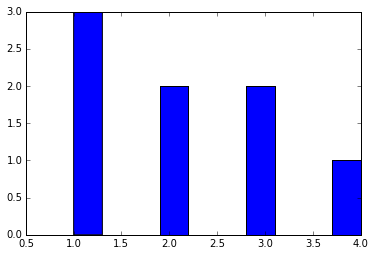

In [27]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%pylab inline
import matplotlib.pyplot as plt
plt.hist(data)

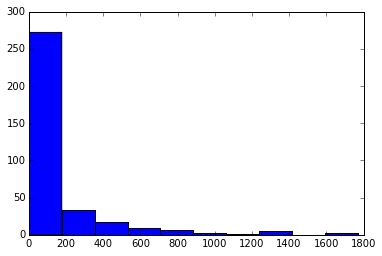

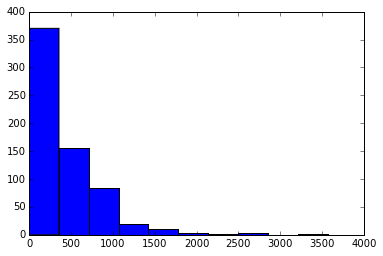

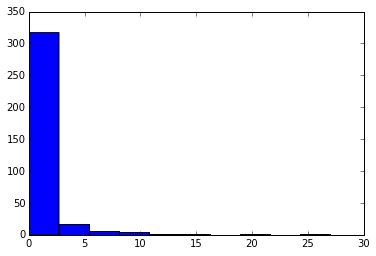

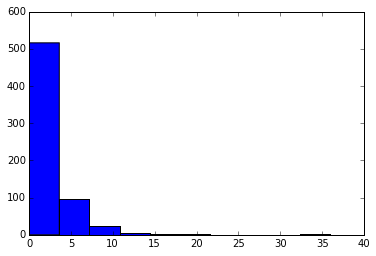

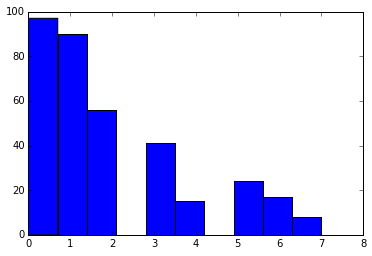

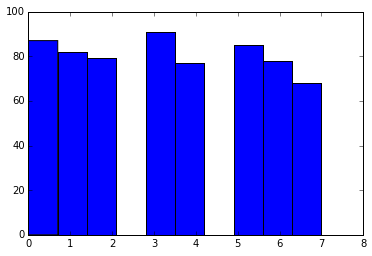

In [28]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

plt.hist(non_passing_minutes.values())
plt.show()
plt.hist(passing_minutes.values())
plt.show()
plt.hist(non_passing_lessons.values())
plt.show()
plt.hist(passing_lessons.values())
plt.show()
plt.hist(non_passing_visits.values())
plt.show()
plt.hist(passing_visits.values())
plt.show()

## Improving Plots and Sharing Findings

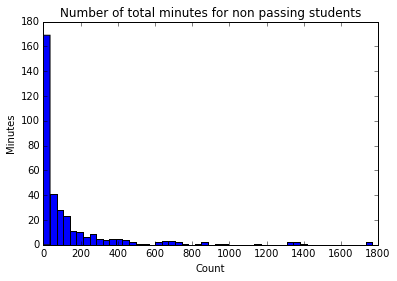

In [34]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

# Would try seaborn but I'm having an error with the current version of 
# conda's matplotlib which is required to install seaborn.

plt.hist(non_passing_minutes.values(), bins=50)
plt.title("Number of total minutes for non passing students")
plt.ylabel("Minutes")
plt.xlabel("Count")
plt.show()